## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('/Users/pete/Documents/Fintech-Workspace/M3/Challenge_coinbase_bitstamp/Starter_Code/resources/bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitstamp.head()
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('/Users/pete/Documents/Fintech-Workspace/M3/Challenge_coinbase_bitstamp/Starter_Code/resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
coinbase.head()
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
bitstamp.isna().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE

bitstamp.dropna(inplace=True)

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitstamp.Close = bitstamp.Close.str.replace("$","")

In [9]:

len(coinbase)

129540

In [10]:
len(bitstamp)

129067

### Step 3: Convert the data type of the Close column to a `float`.

In [11]:
# Convert the Close data type to a float
# YOUR CODE HERE
bitstamp.Close = bitstamp.Close.astype(float)


### Step 3a:  Verify that the float conversion occured


In [12]:
bitstamp['Close'].dtypes

dtype('float64')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [13]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitstamp.duplicated().sum()
# bitstamp.isnull().mean()
bitstamp.drop_duplicates(inplace=True)

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [14]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE
coinbase.dropna(inplace=True)
coinbase.isna().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [15]:
coinbase.Close = coinbase.Close.str.replace("$","")


In [16]:
coinbase.Close = coinbase.Close.astype(float)

In [17]:
coinbase['Close'].dtypes


dtype('float64')

In [18]:
bitstamp.drop_duplicates(inplace=True)
coinbase.duplicated().sum()

0

coinbase.Close = coinbase.Close.astype(float)

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [19]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,'Close']

# Review the first five rows of the DataFrame
# YOUR CODE HERE
bitstamp_sliced.head()


Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [20]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_sliced = coinbase.loc[:,'Close']

# Review the first five rows of the DataFrame
# YOUR CODE HERE
coinbase_sliced.head()


Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [21]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [22]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstsamp Sliced'}, xlabel='Timestamp'>

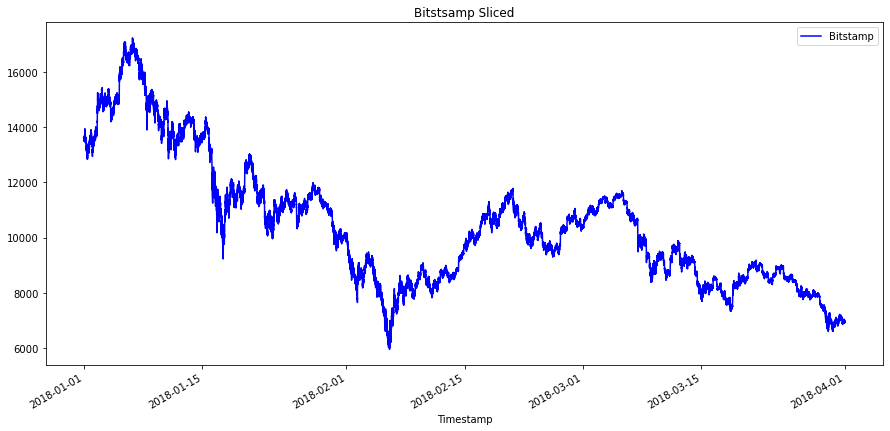

In [23]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp_sliced.plot(legend=True, figsize=(15, 7), title="Bitstsamp Sliced", color="blue", label="Bitstamp")

<AxesSubplot:title={'center':'Coinbase Sliced'}, xlabel='Timestamp'>

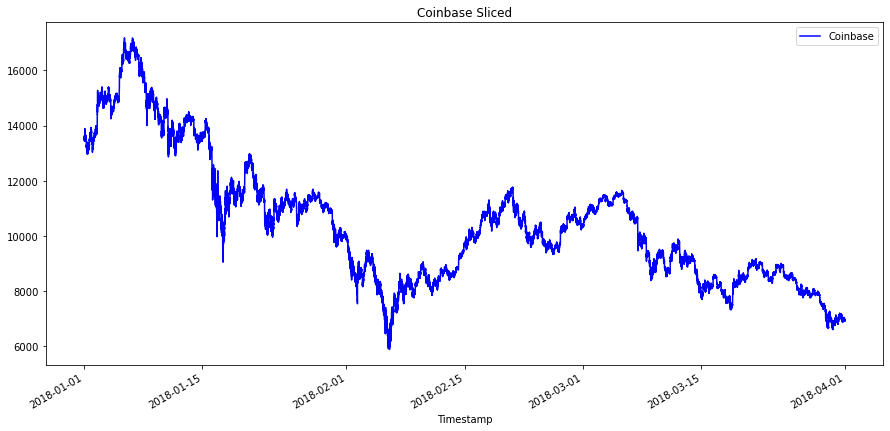

In [24]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase_sliced.plot(legend=True, figsize=(15, 7), title="Coinbase Sliced", color="blue", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Overlay Plot'}, xlabel='Timestamp'>

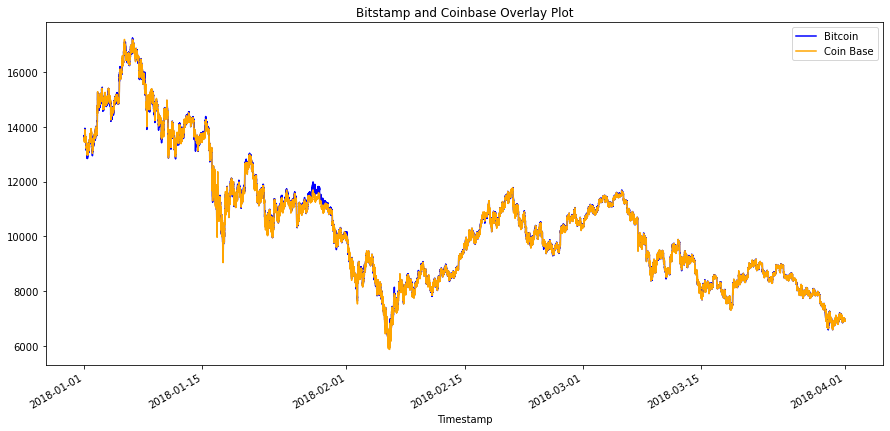

In [25]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

bitstamp['Close'].plot(legend=True, figsize=(15, 7), title="Bitstamp and Coinbase Overlay Plot", color="blue", label="Bitcoin")
coinbase['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="Coin Base")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

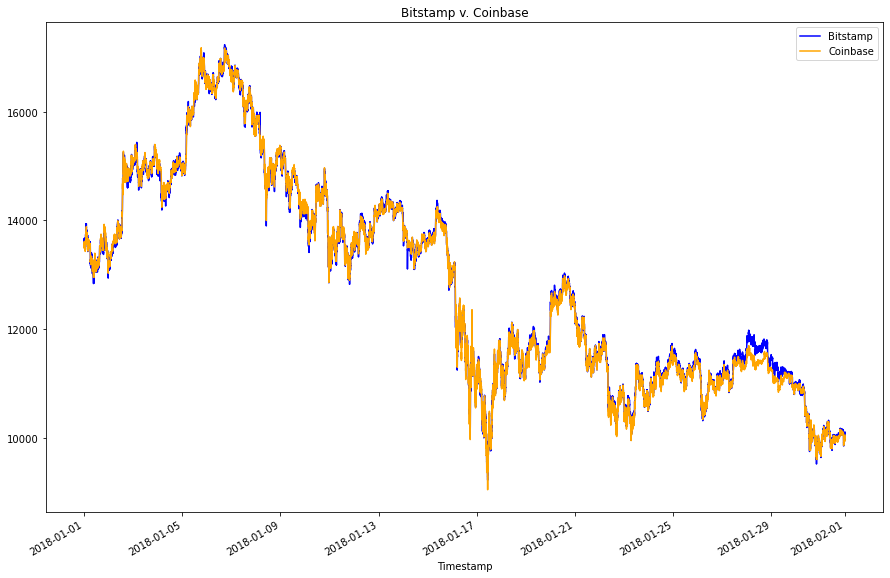

In [26]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

bitstamp.loc['01/2018','Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase.loc['01/2018','Close'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

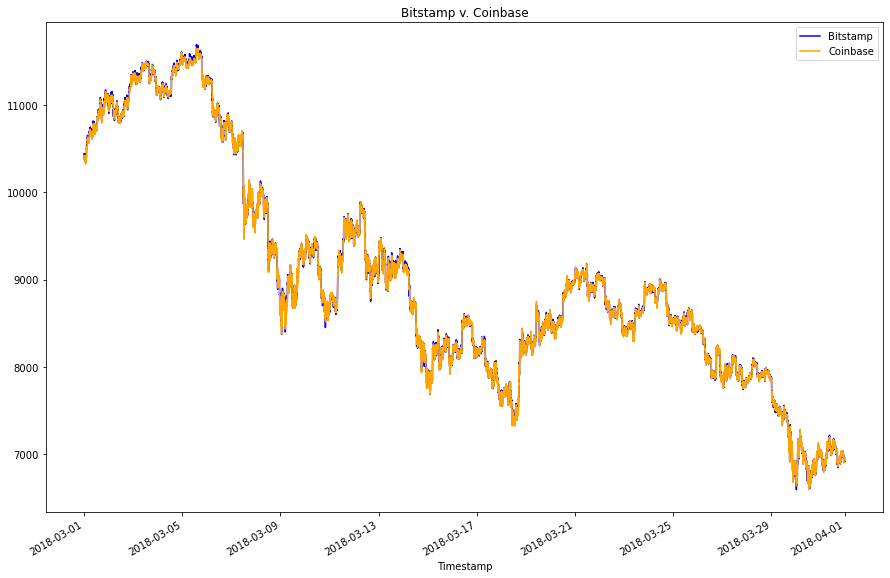

In [27]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
bitstamp.loc['03/2018','Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase.loc['03/2018','Close'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

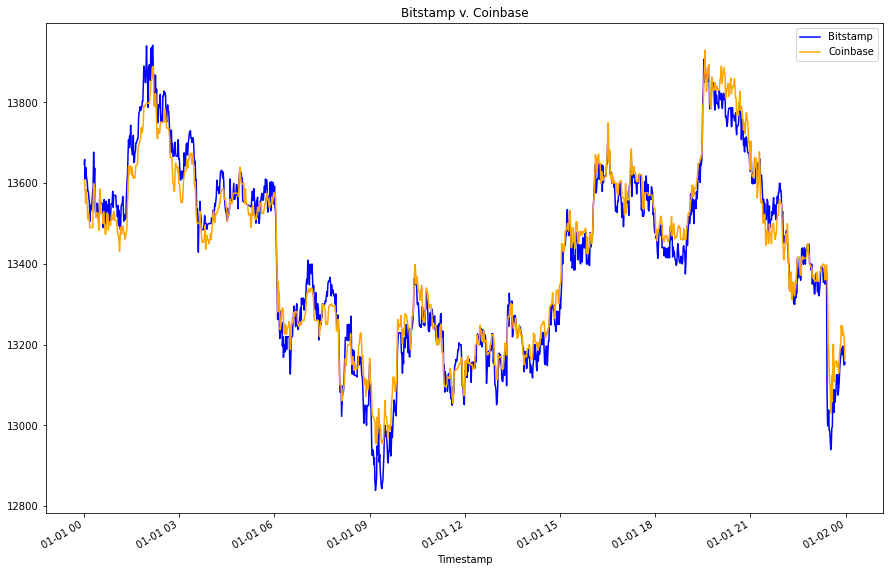

In [28]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp.loc['01/01/2018','Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase.loc['01/01/2018','Close'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [29]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase.loc['01/01/2018','Close'] - bitstamp.loc['01/01/2018','Close']

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()

count    1421.000000
mean        5.767368
std        46.214511
min      -142.000000
25%       -26.890000
50%         5.480000
75%        36.000000
max       319.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early Arb Spread'}>

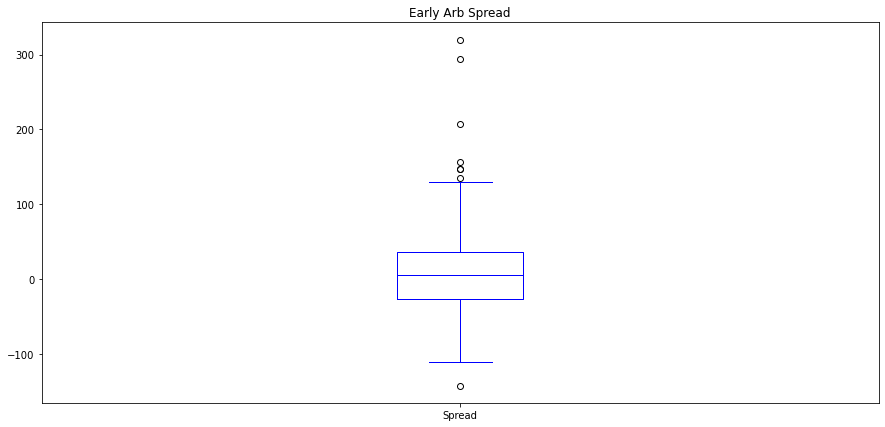

In [30]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_early.plot(kind="box",legend=True, figsize=(15, 7), title="Early Arb Spread", color="blue", label="Spread")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

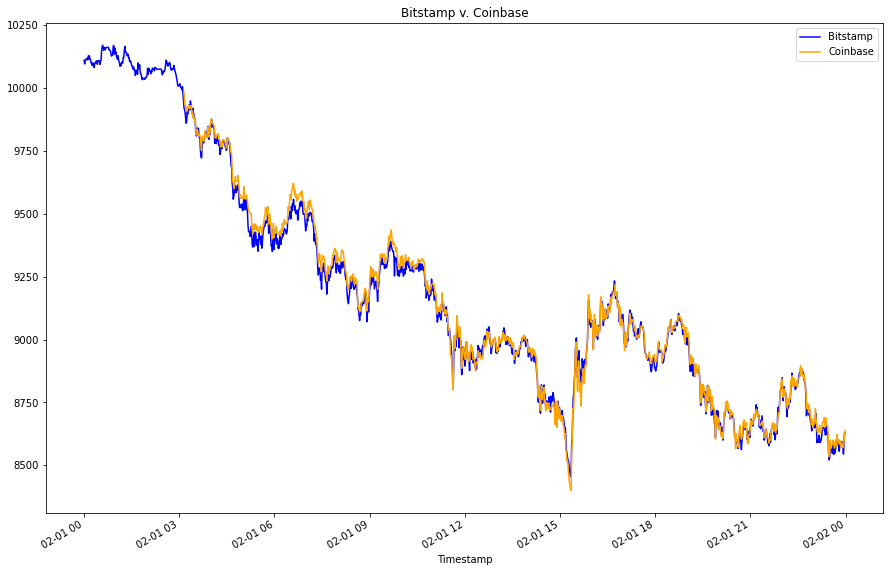

In [31]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp.loc['02/01/2018','Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase.loc['02/01/2018','Close'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [32]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle =  coinbase.loc['02/28/2018','Close'] - bitstamp.loc['02/28/2018','Close']

# Generate summary statistics 
# YOUR CODE HERE
arbitrage_spread_middle.describe()

count    1430.000000
mean       -7.755825
std        11.296502
min       -46.000000
25%       -15.207500
50%        -7.815000
75%        -0.145000
max        35.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Middle Arb Spread'}>

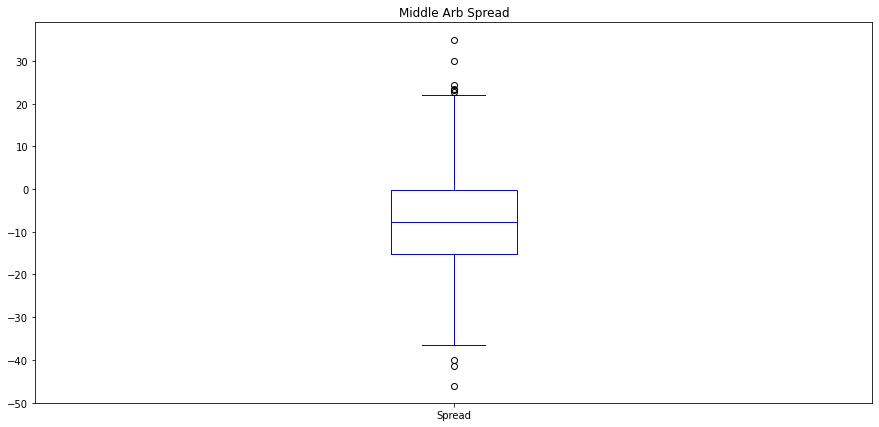

In [33]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE

arbitrage_spread_middle.plot(kind="box",legend=True, figsize=(15, 7), title="Middle Arb Spread", color="blue", label="Spread")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

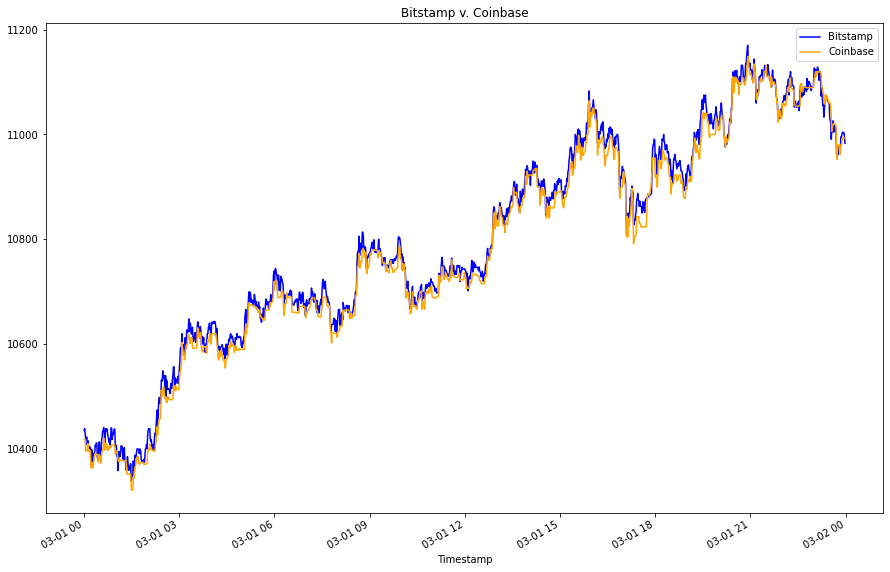

In [34]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

bitstamp.loc['03/01/2018','Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase.loc['03/01/2018','Close'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [35]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late =  - coinbase.loc['03/01/2018','Close'] -  bitstamp.loc['03/01/2018','Close']

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE
arbitrage_spread_late.describe()

count     1425.000000
mean    -21577.743902
std        419.559409
min     -22314.990000
25%     -21944.790000
50%     -21527.440000
75%     -21323.420000
max     -20664.540000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Late Arb Spread'}>

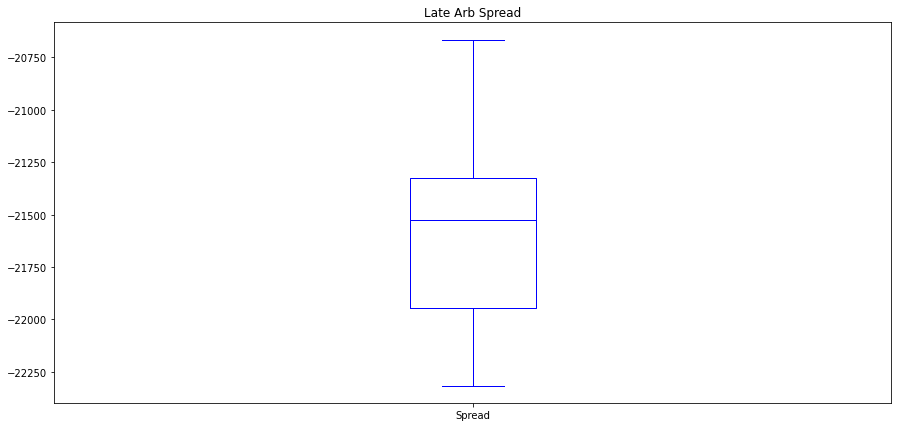

In [36]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE

arbitrage_spread_late.plot(kind="box",legend=True, figsize=(15, 7), title="Late Arb Spread", color="blue", label="Spread")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [37]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
# 

exch_combined = pd.concat([coinbase, bitstamp], axis=1)

exch_combined.columns = ['Coinbase Open', 'Coinbase High', 'Coinbase Low', 'Coinbase Close', 'Coinbase BTC Volume', 'Coinbase USD Volume',
       'Coinbase Weighted Price', 'Bitstamp Open', 'Bitstamp High', 'Bitstamp Low', 'Bitstamp Close', 'Bitstamp BTC Volume',
       'Bitstamp USD Volume', 'Bitstamp Weighted Price']


exch_combined['coinbase_greater'] = exch_combined['Coinbase Close'] > exch_combined['Bitstamp Close']
exch_combined['arb_spread'] = abs(exch_combined['Coinbase Close'] -  exch_combined['Bitstamp Close'])

exch_combined.describe()

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,arb_spread
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000,128852.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448,24.289187
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480,36.027190
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212,0.000000
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020,6.140000
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411,14.170000
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560,28.710000
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502,606.800000


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [38]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

exch_combined.loc[exch_combined['coinbase_greater'] == True, 'spread_return'] = exch_combined['arb_spread'] / exch_combined['Coinbase Close']
exch_combined.loc[exch_combined['coinbase_greater'] == False, 'spread_return'] = exch_combined['arb_spread'] / exch_combined['Bitstamp Close']

# Slice the merged into three dates

exch_combined_early = exch_combined['2018-01-01']
exch_combined_middle = exch_combined['2018-02-14']
exch_combined_late = exch_combined['2018-03-13']

exch_combined_early.head(5)

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,coinbase_greater,arb_spread,spread_return
Timestamp,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479,False,37.99,0.002784
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816,False,57.09,0.004180
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247,False,30.22,0.002220
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128,False,88.75,0.006507
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329,False,36.56,0.002684


In [39]:
exch_combined_middle.head(5)

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,coinbase_greater,arb_spread,spread_return
Timestamp,,,,,,,,,,,,,,,,,
2018-02-14 00:00:00,8797.22,8797.22,8797.21,8797.22,1.366510,12021.484003,8797.218393,8809.42,8809.42,8791.20,8791.20,0.684284,6027.521920,8808.507928,True,6.02,0.000684
2018-02-14 00:01:00,8797.22,8797.22,8797.21,8797.22,1.018933,8963.775893,8797.214190,8792.83,8802.55,8791.24,8792.80,0.518902,4563.172323,8793.898523,True,4.42,0.000502
2018-02-14 00:02:00,8797.22,8797.22,8797.21,8797.22,3.767927,33147.271398,8797.216167,8801.57,8802.31,8785.74,8799.05,0.812180,7140.155439,8791.344323,False,1.83,0.000208
2018-02-14 00:03:00,8797.21,8797.21,8761.10,8761.10,45.914869,403054.557090,8778.301364,8786.01,8786.01,8759.92,8759.92,4.856812,42624.074011,8776.142080,True,1.18,0.000135
2018-02-14 00:04:00,8761.11,8761.11,8729.93,8732.06,69.621010,608814.691290,8744.697747,8758.73,8770.16,8729.14,8759.85,43.744939,382552.402940,8745.066568,False,27.79,0.003172


In [40]:
exch_combined_late.head(5)

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,coinbase_greater,arb_spread,spread_return
Timestamp,,,,,,,,,,,,,,,,,
2018-03-13 00:00:00,9041.00,9041.00,9020.60,9020.61,1.388972,12550.916315,9036.120326,9047.99,9047.99,9025.27,9025.27,0.615461,5562.888494,9038.576296,False,4.66,0.000516
2018-03-13 00:01:00,9020.61,9050.00,9020.61,9050.00,14.550406,131484.116850,9036.456916,9026.54,9054.27,9026.50,9054.27,9.638821,87081.500185,9034.455825,False,4.27,0.000472
2018-03-13 00:02:00,9049.67,9050.00,9049.67,9049.99,2.894825,26197.962180,9049.929818,9047.98,9050.00,9047.98,9050.00,1.000000,9049.979058,9049.979058,False,0.01,0.000001
2018-03-13 00:03:00,9050.00,9065.16,9049.99,9065.16,7.897084,71506.112102,9054.748520,9050.00,9062.86,9050.00,9062.86,1.216280,11010.567314,9052.658810,True,2.30,0.000254
2018-03-13 00:04:00,9065.16,9128.90,9065.16,9128.89,27.448285,249548.814890,9091.599658,9068.70,9121.01,9064.06,9121.01,57.672498,524773.074540,9099.191001,True,7.88,0.000863


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [41]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

has_min_spread = exch_combined_early['spread_return'] > .01
profitable_trades_early = exch_combined_early[has_min_spread]

has_min_spread = exch_combined_middle['spread_return'] > .01
profitable_trades_middle = exch_combined_middle[has_min_spread]

has_min_spread = exch_combined_late['spread_return'] > .01
profitable_trades_late = exch_combined_late[has_min_spread]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_early.head(5)

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,coinbase_greater,arb_spread,spread_return
Timestamp,,,,,,,,,,,,,,,,,
2018-01-01 01:58:00,13797.98,13798.00,13796.09,13798.00,3.613626,4.986065e+04,13797.956345,13872.08,13940.00,13863.32,13940.00,13.431038,1.870415e+05,13926.064246,False,142.00,0.010187
2018-01-01 09:10:00,13013.58,13013.58,13003.33,13008.98,17.831852,2.319899e+05,13009.857138,12920.09,12940.11,12861.65,12861.65,39.765987,5.129747e+05,12899.835761,True,147.33,0.011325
2018-01-01 23:25:00,13397.47,13397.47,13375.89,13375.89,6.405970,8.579246e+04,13392.580481,13370.15,13370.15,13082.00,13082.00,308.037285,4.081409e+06,13249.722445,True,293.89,0.021972
2018-01-01 23:26:00,13375.89,13375.89,13319.00,13319.00,53.977041,7.207346e+05,13352.613832,13079.38,13079.38,12967.92,12999.01,174.256462,2.266153e+06,13004.697124,True,319.99,0.024025
2018-01-01 23:27:00,13319.00,13319.00,13205.55,13207.33,110.056208,1.459956e+06,13265.551246,12975.01,13000.00,12970.00,13000.00,68.835422,8.946284e+05,12996.628552,True,207.33,0.015698


In [42]:
profitable_trades_middle.head(5)

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,coinbase_greater,arb_spread,spread_return
Timestamp,,,,,,,,,,,,,,,,,


In [43]:
profitable_trades_late.head(5)

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,coinbase_greater,arb_spread,spread_return
Timestamp,,,,,,,,,,,,,,,,,


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [44]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_early.describe()

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,arb_spread,spread_return
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000
mean,13299.462500,13299.688750,13265.985000,13267.152500,42.832023,5.665182e+05,13285.467316,13156.641250,13177.981250,13083.838750,13109.102500,84.314686,1.106779e+06,13132.831619,193.550000,0.014565
std,241.216547,241.013025,244.297626,243.966917,34.722593,4.604247e+05,242.260822,320.062525,334.205392,320.542729,341.655252,104.631091,1.382960e+06,335.890116,73.727349,0.005509
min,13013.580000,13013.580000,13003.330000,13008.980000,3.613626,4.986065e+04,13009.857138,12920.090000,12940.110000,12861.650000,12861.650000,13.431038,1.870415e+05,12899.835761,135.180000,0.010187
25%,13164.060000,13164.507500,13132.255000,13132.255000,14.975382,1.954405e+05,13149.340753,12984.520000,12999.157500,12966.255000,12981.565000,22.987970,2.990928e+05,12990.789424,145.615000,0.010931
50%,13262.280000,13262.280000,13195.275000,13196.165000,45.713367,6.002806e+05,13231.929493,13024.365000,13048.790000,12970.885000,12999.505000,34.621114,4.476890e+05,13002.013672,151.595000,0.011592
75%,13381.285000,13381.285000,13333.222500,13333.222500,55.318968,7.363635e+05,13362.605494,13152.072500,13152.072500,13015.092500,13049.135000,95.190682,1.237509e+06,13072.257536,228.970000,0.017266
max,13797.980000,13798.000000,13796.090000,13798.000000,110.056208,1.459956e+06,13797.956345,13872.080000,13940.000000,13863.320000,13940.000000,308.037285,4.081409e+06,13926.064246,319.990000,0.024025


In [45]:
profitable_trades_middle.describe()

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,arb_spread,spread_return
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
profitable_trades_late.describe()


,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,arb_spread,spread_return
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [47]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

profitable_trades_early.loc[profitable_trades_early['coinbase_greater'] == True, 'profit'] = profitable_trades_early['spread_return'] * profitable_trades_early['Coinbase Close']
profitable_trades_early.loc[profitable_trades_early['coinbase_greater'] == False, 'profit'] = profitable_trades_early['spread_return'] * profitable_trades_early['Bitstamp Close']


profitable_trades_middle.loc[profitable_trades_early['coinbase_greater'] == True, 'profit'] = profitable_trades_middle['spread_return'] * profitable_trades_middle['Coinbase Close']
profitable_trades_middle.loc[profitable_trades_early['coinbase_greater'] == False, 'profit'] = profitable_trades_middle['spread_return'] * profitable_trades_middle['Bitstamp Close']

profitable_trades_late.loc[profitable_trades_early['coinbase_greater'] == True, 'profit'] = profitable_trades_late['spread_return'] * profitable_trades_late['Coinbase Close']
profitable_trades_late.loc[profitable_trades_early['coinbase_greater'] == False, 'profit'] = profitable_trades_late['spread_return'] * profitable_trades_late['Bitstamp Close']

# Drop any missing values from the profit DataFrame

#profit_per_trade_early = profitable_trades_early.dropna()
#profit_per_trade_middle = profitable_trades_middle.dropna()
profit_per_trade_late = profitable_trades_late.dropna()
#
# View the early profit DataFrame
# YOUR CODE HERE
profitable_trades_early.tail()

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,coinbase_greater,arb_spread,spread_return,profit
Timestamp,,,,,,,,,,,,,,,,,,
2018-01-01 23:26:00,13375.89,13375.89,13319.00,13319.00,53.977041,7.207346e+05,13352.613832,13079.38,13079.38,12967.92,12999.01,174.256462,2.266153e+06,13004.697124,True,319.99,0.024025,319.99
2018-01-01 23:27:00,13319.00,13319.00,13205.55,13207.33,110.056208,1.459956e+06,13265.551246,12975.01,13000.00,12970.00,13000.00,68.835422,8.946284e+05,12996.628552,True,207.33,0.015698,207.33
2018-01-01 23:28:00,13205.56,13205.56,13185.00,13185.00,59.344750,7.832503e+05,13198.307741,13000.00,13048.85,12992.79,13038.18,25.618413,3.333750e+05,13013.102566,True,146.82,0.011135,146.82
2018-01-01 23:29:00,13185.01,13185.01,13143.00,13143.00,42.790695,5.633500e+05,13165.245634,13048.73,13048.73,12971.77,12987.14,15.096639,1.962462e+05,12999.330219,True,155.86,0.011859,155.86
2018-01-01 23:31:00,13101.21,13103.00,13100.02,13100.02,48.636040,6.372112e+05,13101.626111,12987.69,12996.63,12961.26,12964.84,29.476242,3.824033e+05,12973.272040,True,135.18,0.010319,135.18


In [48]:
profitable_trades_middle.tail()

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,coinbase_greater,arb_spread,spread_return,profit
Timestamp,,,,,,,,,,,,,,,,,,


In [49]:
profitable_trades_late.tail()

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,coinbase_greater,arb_spread,spread_return,profit
Timestamp,,,,,,,,,,,,,,,,,,


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [50]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profitable_trades_early.describe()

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,arb_spread,spread_return,profit
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000
mean,13299.462500,13299.688750,13265.985000,13267.152500,42.832023,5.665182e+05,13285.467316,13156.641250,13177.981250,13083.838750,13109.102500,84.314686,1.106779e+06,13132.831619,193.550000,0.014565,193.550000
std,241.216547,241.013025,244.297626,243.966917,34.722593,4.604247e+05,242.260822,320.062525,334.205392,320.542729,341.655252,104.631091,1.382960e+06,335.890116,73.727349,0.005509,73.727349
min,13013.580000,13013.580000,13003.330000,13008.980000,3.613626,4.986065e+04,13009.857138,12920.090000,12940.110000,12861.650000,12861.650000,13.431038,1.870415e+05,12899.835761,135.180000,0.010187,135.180000
25%,13164.060000,13164.507500,13132.255000,13132.255000,14.975382,1.954405e+05,13149.340753,12984.520000,12999.157500,12966.255000,12981.565000,22.987970,2.990928e+05,12990.789424,145.615000,0.010931,145.615000
50%,13262.280000,13262.280000,13195.275000,13196.165000,45.713367,6.002806e+05,13231.929493,13024.365000,13048.790000,12970.885000,12999.505000,34.621114,4.476890e+05,13002.013672,151.595000,0.011592,151.595000
75%,13381.285000,13381.285000,13333.222500,13333.222500,55.318968,7.363635e+05,13362.605494,13152.072500,13152.072500,13015.092500,13049.135000,95.190682,1.237509e+06,13072.257536,228.970000,0.017266,228.970000
max,13797.980000,13798.000000,13796.090000,13798.000000,110.056208,1.459956e+06,13797.956345,13872.080000,13940.000000,13863.320000,13940.000000,308.037285,4.081409e+06,13926.064246,319.990000,0.024025,319.990000


In [51]:
profitable_trades_middle.describe()

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,arb_spread,spread_return,profit
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
profitable_trades_late.describe()

,Coinbase Open,Coinbase High,Coinbase Low,Coinbase Close,Coinbase BTC Volume,Coinbase USD Volume,Coinbase Weighted Price,Bitstamp Open,Bitstamp High,Bitstamp Low,Bitstamp Close,Bitstamp BTC Volume,Bitstamp USD Volume,Bitstamp Weighted Price,arb_spread,spread_return,profit
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


IndexError: index 0 is out of bounds for axis 0 with size 0

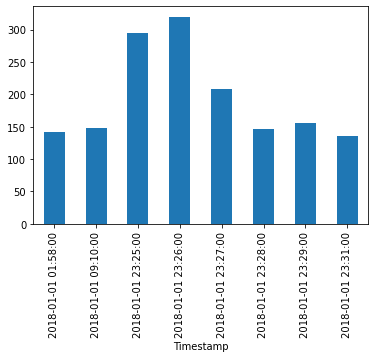

In [53]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

profitable_trades_early['profit'].plot(kind = "bar")
profitable_trades_middle['profit'].plot(kind = "bar")
profitable_trades_late['profit'].plot(kind = "bar")




#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [ ]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

profitable_trades_early['profit'].sum()

#No profits greater than 1% on middle and late trades so can not chart

# profitable_trades_middle['profit'].sum()
# profitable_trades_middle['profit'].sum()

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profitable_trades_early['profit'].cumsum()
cumulative_profit_middle = profitable_trades_middle['profit'].cumsum()
cumulative_profit_late = profitable_trades_late['profit'].cumsum()

cumulative_profit_early.tail(50)

In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

# not gonna plot them since middle and late periiods have no returns > 1%
cumulative_profit_early.plot(kind="bar", title = "Culmulative Profits")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Yes, It appears that the arbitrage diminished in the beginning of the dataset.